# 07_기계학습_1

# Train Test Split

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(X , y ,test_size=0.3, random_state=0)

# y의 비율이 불균형할 때 사용하는 층화추출
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.3, random_state=0, stratify=y_target)

# 정규화, 표준화 - StandardScaler, MinMaxScaler, Log
**train 데이터에는 .fit_transform(X_train) <br>
test 데이터에는 .transform(X_test)다 명심**
- 0단계 : 그냥 씀
- 1단계 : 로그변환을 해본다
- 2단계 : 정규화, 표준화를 해본다
- 3단계 : 성능이 별 차이 없으면 다항 변수를 만들어본다

- y(타겟변수)는 hist를 그려봐서 분포가 한쪽으로 쏠려있으면 로그 변환을 해서 왜곡을 낮춘다.
- y(타겟변수)는 변환을 한다면 일반적으로 로그 변환을 적용한다.

- np.log1p(x)는 에러를 방지하기 위해 x에 1을 자동으로 더해서 계산해주는 것
- np.log1p(x)의 역함수는 np.expm1(x)

In [ ]:
# log 씌우고
y_log = np.log1p(y)
# train, test split 하고
# 모델링 하고

# 평가는 test, pred 모두 expm1으로 풀어서 비교
y_test_exp = np.expm1(y_test)
y_pred_exp = np.expm1(y_pred)

(y_test_exp, y_pred_exp)

## 개별 정규화/표준화

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures

scaled_data = StandardScaler().fit_transform(X_train)
scaled_data = MinMaxScaler().fit_transform(X_train)
scaled_data = np.log1p(input_data)
scaled_data = PolynomialFeatures(degree=p_degree, include_bias=False).fit_transform(scaled_data)

## 한 번에 다 비교해보기

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures

# method는 표준 정규 분포 변환(Standard), 최대값/최소값 정규화(MinMax), 로그변환(Log) 결정
# p_degree는 다향식 특성을 추가할 때 적용. p_degree는 2이상 부여하지 않음. 
def get_scaled_data(method='None', p_degree=None, input_data=None):
    if method == 'Standard':
        scaled_data = StandardScaler().fit_transform(input_data)
    elif method == 'MinMax':
        scaled_data = MinMaxScaler().fit_transform(input_data)
    elif method == 'Log':
        scaled_data = np.log1p(input_data)
    else:
        scaled_data = input_data

    if p_degree != None:
        scaled_data = PolynomialFeatures(degree=p_degree, 
                                         include_bias=False).fit_transform(scaled_data)
    
    return scaled_data

In [ ]:
# Ridge의 alpha값을 다르게 적용하고 다양한 데이터 변환방법에 따른 RMSE 추출. 
alphas = [0.1, 1, 10, 100]
#변환 방법은 모두 6개, 원본 그대로, 표준정규분포, 표준정규분포+다항식 특성
# 최대/최소 정규화, 최대/최소 정규화+다항식 특성, 로그변환 
scale_methods=[(None, None), ('Standard', None), ('Standard', 2), 
               ('MinMax', None), ('MinMax', 2), ('Log', None)]
for scale_method in scale_methods:
    X_data_scaled = get_scaled_data(method=scale_method[0], p_degree=scale_method[1], 
                                    input_data=X_data)
    print('\n## 변환 유형:{0}, Polynomial Degree:{1}'.format(scale_method[0], scale_method[1]))
    get_linear_reg_eval('Ridge', params=alphas, X_data_n=X_data_scaled, 
                        y_target_n=y_target, verbose=False)

# 오버샘플링 / 언더샘플링

- train set에만 쓰는 것이지, 당연히 test set에는 쓰는 거 아니다!
- 오버샘플링이 1옵션이고, 오버샘플링 방식은 일단 SMOTE 방식을 써라
- 만약 다른 것도 해야하면 아래 참조

- 데이터 불균형 처리 방법
1. 언더샘플링
  - 데이터 소실이 크고 중요한 데이터를 잃게 될 수 있음
  - 1) 무작위추출: 무작위로 정상 데이터 일부만 선택
  - 2) 유의정보: 유의한 데이터만 남김 (EasyEnsemble, BalanceCasade)
2. 오버샘플링
  - 1) 무작위추출: 무작위로 소수 데이터 복제
  - 2) 유의정보: 사전에 기준을 정해서 소수 데이터 복제
  - 정보가 손실되지 않으나 단순 데이터 복제는 오버피팅 초래 가능
  - 3) 합성데이터 생성: 새로운 복제본을 만들어 냄
    - SMOTE: K-NN알고리즘 활용해 데이터 생성
      - 소수 클래스의 데이터 중 특정 벡터와 가까운 k개의 이웃 벡터 선정 > 기준벡터와 선정한 벡터를 선분으로 이음 > 선분 위의 임의의 점이 새로운 벡터
      - 단점: 다른 클래스는 존재하지 않아 기존 데이터와 중첩될 수 있다. 노이즈 생성 가능.

3. 비용 민감 학습
  - 오분류하는 행위를 비용으로 측정
  - Total Cost = C(FN)*FN + C(FP)*FP
    - FN: 잘못 예측된 부정적 사례의 수
    - FP: 잘못 예측된 긍정적 사례의 수
    - C(-): 비용함수
  
[출처] 
- https://mkjjo.github.io/python/2019/01/04/smote_duplicate.html  
- http://www.incodom.kr/SMOTE#:~:text=SMOTE%EB%8A%94%20Synthetic%20Minority%20Over,%EC%83%88%EB%A1%AD%EA%B2%8C%20%EC%83%9D%EC%84%B1%ED%95%98%EB%8A%94%20%EB%B0%A9%EB%B2%95%EC%9D%B4%EB%8B%A4.

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)
X_train_over, y_train_over = smote.fit_sample(X_train, y_train)

In [ ]:
## 오버샘플링
import imblearn.over_sampling as osam 

# 오버샘플링 전
model = SVC(kernel = 'rbf').fit(train_X, train_Y)
predicted = model.predict(test_X)

# 랜덤 오버샘플링
ros = osam.RandomOverSampler()
oversampled_X, oversampled_Y = ros.fit_sample(train_X, train_Y)
model = SVC(kernel = 'rbf').fit(oversampled_X, oversampled_Y)
predicted = model.predict(test_X)

# SMOTE
SMOTEos = osam.SMOTE(k_neighbors = 5)
oversampled_X, oversampled_Y = SMOTEos.fit_sample(train_X, train_Y)
model = SVC(kernel = 'rbf').fit(oversampled_X, oversampled_Y)
predicted = model.predict(test_X)

# Borderline SMOTE
B_SMOTEos = osam.SMOTE(k_neighbors = 5, m_neighbors = 5)
oversampled_X, oversampled_Y = B_SMOTEos.fit_sample(train_X, train_Y)

# ADASYN
A_SMOTEos = osam.ADASYN(n_neighbors = 5)
oversampled_X, oversampled_Y = A_SMOTEos.fit_sample(train_X, train_Y)

In [ ]:
## 언더샘플링

# 랜덤 언더샘플링
import imblearn.under_sampling as usam
rus = usam.RandomUnderSampler()
undersampled_X, undersampled_Y = rus.fit_sample(train_X, train_Y)

# k-NN 기반의 언더샘플링
krus = usam.CondensedNearestNeighbour(n_neighbors = 3)
undersampled_X, undersampled_Y = krus.fit_sample(train_X, train_Y)

# 수정된 k-NN 기반의 언더샘플링
erus = usam.CondensedNearestNeighbour(n_neighbors = 3, n_jobs = 1)
undersampled_X, undersampled_Y = erus.fit_sample(train_X, train_Y)

# NearMiss 언더샘플링 Type 1
nrus1 = usam.NearMiss(n_neighbors = 3, version = 1)
undersampled_X, undersampled_Y = nrus1.fit_sample(train_X, train_Y)

# NearMiss 언더샘플링 Type 2
nrus2 = usam.NearMiss(n_neighbors = 3, version = 2)
undersampled_X, undersampled_Y = nrus2.fit_sample(train_X, train_Y)

# NearMiss 언더샘플링 Type 3
nrus3 = usam.NearMiss(n_neighbors = 3, version = 3)
undersampled_X, undersampled_Y = nrus3.fit_sample(train_X, train_Y)

# 모델 성능 평가

## 회귀 모델 성능 평가
- R2
- MAE Mean absolute error
- MSE Mean Squared Error
- RMSE Root MSE
- RMSLE (Root Mean Square Log Error) : 오류값의 로그에 대한 RMSE
- MAPE mean absolute percentage error

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error , r2_score

r2 = r2_score(y_test, y_preds) # R2 : 0~1, 1에 가까울수록 설명력이 높은 것, 음수가 나오는 경우도 있는데, 그건 망한 거.
mae = mean_absolute_error(true, pred)
mse = mean_squared_error(y_test, y_preds) # MSE : 낮을 수록 좋겠지
rmse = np.sqrt(mse) # RMSE : 얘도 당연히 낮을 수록 좋겠지
def rmsle(y, pred): # RMSLE : 얘도 당연히 낮을 수록 좋겠지
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y - log_pred) ** 2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle

In [ ]:
# mape
def mape(y_test, y_preds): 
    y_test, y_preds = np.array(y_test), np.array(y_preds)
    return np.mean(np.abs((y_test - y_preds) / y_test)) * 100

### Cross Validation 시 
- Negative MSE
- RMSE

In [ ]:
from sklearn.model_selection import cross_val_score

neg_mse_scores = cross_val_score(model, X_data, y_target, scoring="neg_mean_squared_error", cv = 5) # Negative MSE
rmse_scores  = np.sqrt(-1 * neg_mse_scores) # RMSE
avg_rmse = np.mean(rmse_scores) # RMSE 평균

## 분류 모델 성능 평가
- 오차행렬
- 정확도
- 정밀도
- 재현율 = 민감도
- F1
- AUC
- 특이도
- ROC - x축 : 1-특이성 = FP / (FP+TN) // y축 : 민감도(재현율) = TP / (FN+TP)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

confusion = confusion_matrix( y_test, pred)
accuracy_score(y_test, lr_preds) # 정확도 : 0~1, 1에 가까울수록 좋다
precision_score(y_test , pred) # 정밀도 : TP/ (FP+TP) 예측 Positive 중에 실제 Positive
recall_score(y_test , pred) # 재현율 : TP/(FN+TP) 실제 Positive 중에 예측이 Positive 암환자는 재현율이 중요
f1_score(y_test,pred) # F1
roc_auc_score(y_test , lr_preds) # AUC : 0~1, 1에 가까울수록 좋다

In [ ]:
# 특이도는 직접 짜야함
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
specificity = tn / (tn+fp)

0.6666666666666666

- ROC curve는 길어서 별도로 정리

In [ ]:
from sklearn.metrics import roc_curve

# 레이블 값이 1일때의 예측 확률을 추출 
pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1] 

fprs , tprs , thresholds = roc_curve(y_test, pred_proba_class1)
# fprs , tprs , thresholds = roc_curve(y_test, pred_proba_class1, pos_label=2) # y에 음수가 있으면 에러나나? 그래서 이렇게

# 5 step에 하나씩 쓰겠다는 소리
# 반환된 임곗값 배열 로우가 47건이므로 샘플로 10건만 추출하되, 임곗값을 5 Step으로 추출. 
thr_index = np.arange(0, thresholds.shape[0], 5)
print('샘플 추출을 위한 임곗값 배열의 index 10개:', thr_index)
print('샘플용 10개의 임곗값: ', np.round(thresholds[thr_index], 2))
# 5 step 단위로 추출된 임계값에 따른 FPR, TPR 값
print('샘플 임곗값별 FPR: ', np.round(fprs[thr_index], 3))
print('샘플 임곗값별 TPR: ', np.round(tprs[thr_index], 3))

In [ ]:
def roc_curve_plot(y_test , pred_proba_c1):
    # 임곗값에 따른 FPR, TPR 값을 반환 받음. 
    fprs , tprs , thresholds = roc_curve(y_test ,pred_proba_c1)

    # ROC Curve를 plot 곡선으로 그림. 
    plt.plot(fprs , tprs, label='ROC')
    # 가운데 대각선 직선을 그림. 
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    
    # FPR X 축의 Scale을 0.1 단위로 변경, X,Y 축명 설정등   
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )'); plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()
    
roc_curve_plot(y_test, lr_clf.predict_proba(X_test)[:, 1] )


## 군집화 모델 성능 평가

# 분류

## 로지스틱 회귀

### 데이터 로딩

In [ ]:
# 데이터 로딩
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

cancer = load_breast_cancer()

### StandardScaler, Train Test split

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# StandardScaler( )로 평균이 0, 분산 1로 데이터 분포도 변환
scaler = StandardScaler()
data_scaled = scaler.fit_transform(cancer.data) 
# 내 생각엔 Split 먼저 하고, fit_transform(X_train)해서 모델링, 그 후에 transform(X_test)가 맞는 것 같음

X_train , X_test, y_train , y_test = train_test_split(data_scaled, cancer.target, test_size=0.3, random_state=0)

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score

# 로지스틱 회귀를 이용하여 학습 및 예측 수행. 
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_preds = lr_clf.predict(X_test)

# accuracy와 roc_auc 측정
print('accuracy: {:0.3f}'.format(accuracy_score(y_test, lr_preds)))
print('roc_auc: {:0.3f}'.format(roc_auc_score(y_test , lr_preds)))

accuracy: 0.982
roc_auc: 0.979


C:\Users\50008313\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [ ]:
# 파라미터 튜닝하는 거
# penalty는 규제 종류
# C는 1/alpha로 작을수록 규제 강도가 커짐
from sklearn.model_selection import GridSearchCV

params={'penalty':['l2', 'l1'],
        'C':[0.01, 0.1, 1, 1, 5, 10]}

grid_clf = GridSearchCV(lr_clf, param_grid=params, scoring='accuracy', cv=3 )
grid_clf.fit(data_scaled, cancer.target)
print('최적 하이퍼 파라미터:{0}, 최적 평균 정확도:{1:.3f}'.format(grid_clf.best_params_, 
                                                  grid_clf.best_score_))

## Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state=156)

# 붓꽃 데이터를 로딩하고, 학습과 테스트 데이터 셋으로 분리
iris_data = load_iris()
X_train , X_test , y_train , y_test = train_test_split(iris_data.data, iris_data.target,
                                                       test_size=0.2,  random_state=11)

# DecisionTreeClassifer 학습. 
dt_clf.fit(X_train , y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=156, splitter='best')

In [ ]:
y_pred = dt_clf.predict(X_test)
y_pred

array([2, 2, 1, 1, 2, 0, 1, 0, 0, 1, 1, 1, 1, 2, 2, 0, 2, 1, 2, 2, 1, 0,
       0, 1, 0, 0, 2, 1, 0, 1])

### 트리 시각화
- `sklearn.tree.export_graphviz`를 이용하여 **.dot** 파일을 생성
- 생성된 dot 파일을 텍스트 편집기에서 불러들인 후, 이를 복사하여 [WebGraphviz.com](http://webgraphviz.com/)에 붙여넣으면 의사결정나무 그림을 얻을 수 있음

In [ ]:
# 시각화를 위한 부분 - tree.dot 파일을 생성해줌

from sklearn.tree import export_graphviz

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함. 
export_graphviz(dt_clf, out_file="tree.dot", class_names=iris_data.target_names , \
feature_names = iris_data.feature_names, impurity=True, filled=True)

In [ ]:
# 에러나면 망한 거 포기. 인터넷 되어야 해결 가능. --> tree.dot 내용 복사해서  WebGraphviz.com에 넣으면 보임

import graphviz

# 위에서 생성된 tree.dot 파일을 Graphviz 읽어서 Jupyter Notebook상에서 시각화 
with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

### feature importance 시각화

Feature importances:
[0.025 0.    0.555 0.42 ]
sepal length (cm) : 0.025
sepal width (cm) : 0.000
petal length (cm) : 0.555
petal width (cm) : 0.420


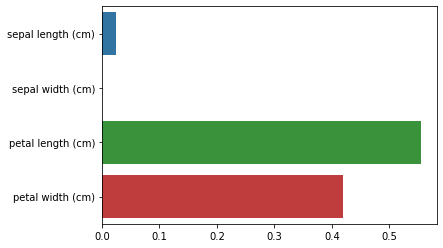

In [ ]:
import seaborn as sns
import numpy as np
%matplotlib inline

# feature importance 추출 
print("Feature importances:\n{0}".format(np.round(dt_clf.feature_importances_, 3)))

# feature별 importance 매핑
for name, value in zip(iris_data.feature_names , dt_clf.feature_importances_):
    print('{0} : {1:.3f}'.format(name, value))

# feature importance를 column 별로 시각화 하기 
sns.barplot(x=dt_clf.feature_importances_ , y=iris_data.feature_names)

### DT GridSearch CV
- max_depth, min_sample_split 조정하며 비교
- train도 해보고, test도 해 보면 됨

- train으로 GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : [ 8 , 12, 16 ,20], 
    'min_samples_split' : [16,24],
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1 )
grid_cv.fit(X_train , y_train)
print('GridSearchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)


- test로 예측하고 정확도 계산

In [ ]:
best_df_clf = grid_cv.best_estimator_

pred1 = best_df_clf.predict(X_test)
accuracy = accuracy_score(y_test , pred1)
print('결정 트리 예측 정확도:{0:.4f}'.format(accuracy))

- GridSearch CV의 세부 주요 내역

In [ ]:
# GridSearchCV객체의 cv_results_ 속성을 DataFrame으로 생성. 
cv_results_df = pd.DataFrame(grid_cv.cv_results_)

# max_depth 파라미터 값과 그때의 테스트(Evaluation)셋, 학습 데이터 셋의 정확도 수치 추출
# 사이킷런 버전이 업그레이드 되면서 아래의 GridSearchCV 객체의 cv_results_에서 mean_train_score는 더이상 제공되지 않습니다
# cv_results_df[['param_max_depth', 'mean_test_score', 'mean_train_score']]

# max_depth 파라미터 값과 그때의 테스트(Evaluation)셋, 학습 데이터 셋의 정확도 수치 추출
cv_results_df[['param_max_depth', 'mean_test_score']]

- feature importance 시각화

In [ ]:
import seaborn as sns

ftr_importances_values = best_df_clf.feature_importances_

# Top 중요도로 정렬을 쉽게 하고, 시본(Seaborn)의 막대그래프로 쉽게 표현하기 위해 Series변환
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns  )

# 중요도값 순으로 Series를 정렬
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

## 앙상블 분류

### Voting

- Logistic과 KNN을 Voting해보겠음

In [ ]:
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


- 개별 모델을 VotingClassifier로 먼저 결합하고 데이터를 train
- parameter에서 'hard', 'soft' 미리 결정

In [ ]:
# 개별 모델은 로지스틱 회귀와 KNN 임. 
lr_clf = LogisticRegression()
knn_clf = KNeighborsClassifier(n_neighbors=8)

# 개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기 
vo_clf = VotingClassifier( estimators=[('LR',lr_clf),('KNN',knn_clf)] , voting='soft' )

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, 
                                                    test_size=0.2 , random_state= 156)

# VotingClassifier 학습/예측/평가. 
vo_clf.fit(X_train , y_train)
pred = vo_clf.predict(X_test)
print('Voting 분류기 정확도: {0:.4f}'.format(accuracy_score(y_test , pred)))

# 개별 모델의 학습/예측/평가.
classifiers = [lr_clf, knn_clf]
for classifier in classifiers:
    classifier.fit(X_train , y_train)
    pred = classifier.predict(X_test)
    class_name= classifier.__class__.__name__
    print('{0} 정확도: {1:.4f}'.format(class_name, accuracy_score(y_test , pred)))

Voting 분류기 정확도: 0.9561
LogisticRegression 정확도: 0.9474
KNeighborsClassifier 정확도: 0.9386


### Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# 결정 트리에서 사용한 get_human_dataset( )을 이용해 학습/테스트용 DataFrame 반환
X_train, X_test, y_train, y_test = get_human_dataset()

# 랜덤 포레스트 학습 및 별도의 테스트 셋으로 예측 성능 평가
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train , y_train)
pred = rf_clf.predict(X_test)

accuracy = accuracy_score(y_test , pred)
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))

- GridSearch CV로 파라미터 튜닝 (train으로 튜닝)

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100],
    'max_depth' : [6, 8, 10, 12], 
    'min_samples_leaf' : [8, 12, 18 ],
    'min_samples_split' : [8, 16, 20]
}
# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf , param_grid=params , cv=2, n_jobs=-1 )
grid_cv.fit(X_train , y_train)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

- GridSearch CV 후 test로 성능 평가

In [ ]:
rf_clf1 = RandomForestClassifier(n_estimators=300, max_depth=10, min_samples_leaf=8, \
                                 min_samples_split=8, random_state=0)
rf_clf1.fit(X_train , y_train)
pred = rf_clf1.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test , pred)))

- Feature Importance 시각화

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=X_train.columns  )
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

### GBM (Gradient Boosting Machine)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = get_human_dataset()

# GBM 수행 시간 측정을 위함. 시작 시간 설정.
start_time = time.time()

gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train , y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print('GBM 정확도: {0:.4f}'.format(gb_accuracy))
print("GBM 수행 시간: {0:.1f} 초 ".format(time.time() - start_time))

- GridSearch CV

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100, 500],
    'learning_rate' : [ 0.05, 0.1]
}
grid_cv = GridSearchCV(gb_clf , param_grid=params , cv=2 ,verbose=1)
grid_cv.fit(X_train , y_train)
print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

- GridSearch CV 상세

In [ ]:
scores_df = pd.DataFrame(grid_cv.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score',
'split0_test_score', 'split1_test_score']]

- 최적 모델로 test 수행

In [ ]:
# GridSearchCV를 이용하여 최적으로 학습된 estimator로 predict 수행. 
gb_pred = grid_cv.best_estimator_.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)
print('GBM 정확도: {0:.4f}'.format(gb_accuracy))

### XGB (eXtra Gradient Boost)
- early_stopping_rounds(조기 종료) 숫자를 조정하며 튜닝, 너무 적으면 성능이 안 나오니 적당히 100 정도

In [ ]:
# 사이킷런 래퍼 XGBoost 클래스인 XGBClassifier 임포트
from xgboost import XGBClassifier

evals = [(X_tr, y_tr), (X_val, y_val)]
xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.05, max_depth=3)
xgb_wrapper.fit(X_tr, y_tr,  early_stopping_rounds=50, eval_metric='logloss',
                eval_set=evals,  verbose=True)
w_preds = xgb_wrapper.predict(X_test)
w_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]

- 변수 중요도 시각화

In [ ]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
# 사이킷런 래퍼 클래스를 입력해도 무방. 
plot_importance(xgb_wrapper, ax=ax)

- XGB GridSearch CV 

In [ ]:
from sklearn.model_selection import GridSearchCV

xgb_clf = XGBClassifier(n_estimators=100)
params = {'max_depth':[5, 7] , 'min_child_weight':[1,3] ,'colsample_bytree':[0.5, 0.75] }

# 하이퍼 파라미터 테스트의 수행속도를 향상 시키기 위해 cv 를 지정하지 않음. 
gridcv = GridSearchCV(xgb_clf, param_grid=params)
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric="auc",
           eval_set=[(X_train, y_train), (X_test, y_test)])

print('GridSearchCV 최적 파라미터:',gridcv.best_params_) 

xgb_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

### LGB (LightGBM)
- XGBoost보다 학습시간, 메모리 사용량이 적음
- 카테고리형 피처 자동 변환
- 예측성능은 비슷함
- 적은 데이터 (10,000건 이하)에서는 과적합 발생이 쉬움
- 리프 중심 트리 분할 방식 사용
  - 보통 균형 트리 분할 (Level wise) 방식 사용
  - 오버피팅에 강하지만 균형 맞추기 위한 시간 필요
  - 리프 중심(leaf wise)는 최대 손실 값을 가지는 리프 노드를 지속적으로 분할
  - 트리 깊이 깊어지고 비대칭적 규칙 트리 생성

In [ ]:
# LightGBM의 파이썬 패키지인 lightgbm에서 LGBMClassifier 임포트
from lightgbm import LGBMClassifier
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# 전체 데이터 중 80%는 학습용 데이터, 20%는 테스트용 데이터 추출
X_train, X_test, y_train, y_test=train_test_split(ftr, target, test_size=0.2, random_state=156 )
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=156 )

# 앞서 XGBoost와 동일하게 n_estimators는 400 설정. 
lgbm_wrapper = LGBMClassifier(n_estimators=400, leaerning_rate=0.05)

# y의 class 비율이 극도로 불균형일 때는 아래와 같이 boost_from_average=False로 설정
# lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)

# LightGBM도 XGBoost와 동일하게 조기 중단 수행 가능. 
evals = [(X_tr, y_tr), (X-val, y_val)]
lgbm_wrapper.fit(X_tr, y_tr, early_stopping_rounds=50, eval_metric="logloss", 
                 eval_set=evals, verbose=True)
preds = lgbm_wrapper.predict(X_test)
pred_proba = lgbm_wrapper.predict_proba(X_test)[:, 1]

- 변수 중요도 시각화

In [ ]:
# plot_importance( )를 이용하여 feature 중요도 시각화
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(lgbm_wrapper, ax=ax, feature_names=dataset.feature_names)

- LGB GridSearch CV 

In [ ]:
from sklearn.model_selection import GridSearchCV

LGBM_clf = LGBMClassifier(n_estimators=200)
params = {'num_leaves': [32, 64 ],
          'max_depth':[128, 160],
          'min_child_samples':[60, 100],
          'subsample':[0.8, 1]}

# 하이퍼 파라미터 테스트의 수행속도를 향상 시키기 위해 cv 를 지정하지 않습니다. 
gridcv = GridSearchCV(lgbm_clf, param_grid=params)
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric="auc",
           eval_set=[(X_train, y_train), (X_test, y_test)])

print('GridSearchCV 최적 파라미터:', gridcv.best_params_)
lgbm_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))


## 기타 분류 모델

- KNN clf

In [ ]:
X = [[0], [1], [2], [3]]
y = [0, 0, 1, 1]
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X, y)

print(neigh.predict([[1.1]]))

print(neigh.predict_proba([[0.9]]))

- 가우시안 나이브 베이즈

In [ ]:
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
Y = np.array([1, 1, 1, 2, 2, 2])
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X, Y)

print(clf.predict([[-0.8, -1]]))

- LDA clf

In [ ]:
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
y = np.array([1, 1, 1, 2, 2, 2])
clf = LinearDiscriminantAnalysis()
clf.fit(X, y)

print(clf.predict([[-0.8, -1]]))

- MLP clf

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
X, y = make_classification(n_samples=100, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    random_state=1)
clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)
clf.predict_proba(X_test[:1])

clf.predict(X_test[:5, :])

clf.score(X_test, y_test)

- SVM

In [ ]:
from sklearn.svm import SVC

model = SVC(kernel = 'rbf').fit(train_X, train_Y)
predicted = model.predict(test_X)

# 차원축소
- 잠재된 요소 추출이 목적. 오버피팅 방지
- 피처선택: 종속성이 강한 불필요한 피처 제거
- 피처추출: 기존 피처를 저차원의 중요 피처로 압축

## PCA
- 가장 높은 분산을 가지는 데이터 축으로 차원 축소.
- 분산이 데이터 특성을 가장 잘 나타내는 것으로 간주
- 스케일링 필요 - StandardScaling (여러 속성을 동일한 스케일로 변환하는 것이 필요)

In [3]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
irisDF = pd.DataFrame(iris.data, columns=columns)
irisDF['target'] = iris.target
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


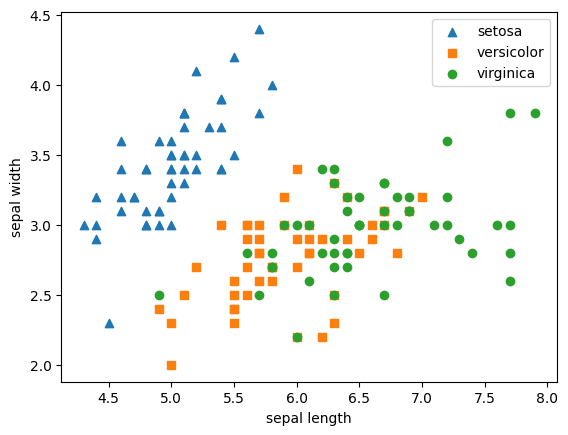

In [4]:
markers = ['^', 's', 'o']

for i, marker in enumerate(markers):
  x_axis_data = irisDF[irisDF['target']==i]['sepal_length']
  y_axis_data = irisDF[irisDF['target']==i]['sepal_width']
  plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])

plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

In [6]:
from sklearn.preprocessing import StandardScaler

iris_scaled = StandardScaler().fit_transform(irisDF.iloc[:, :-1])

In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

#fit( )과 transform( ) 을 호출하여 PCA 변환 데이터 반환
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)
print(iris_pca.shape)

(150, 2)


In [8]:
# PCA 환된 데이터의 컬럼명을 각각 pca_component_1, pca_component_2로 명명
pca_columns=['pca_component_1','pca_component_2']
irisDF_pca = pd.DataFrame(iris_pca, columns=pca_columns)
irisDF_pca['target'] = iris.target
irisDF_pca.head(3)

,pca_component_1,pca_component_2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0


- PCA 변환된 데이터 시각화

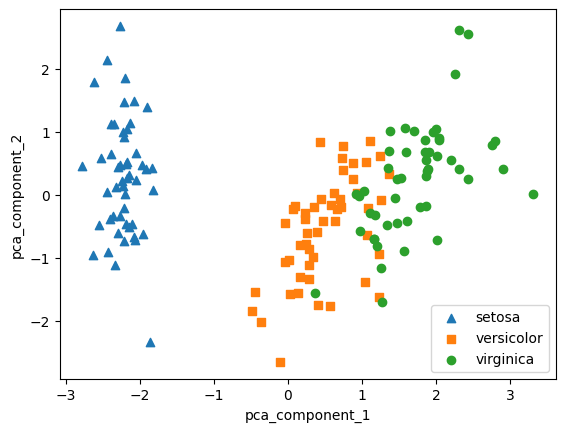

In [9]:
#setosa를 세모, versicolor를 네모, virginica를 동그라미로 표시
markers=['^', 's', 'o']

#pca_component_1 을 x축, pc_component_2를 y축으로 scatter plot 수행. 
for i, marker in enumerate(markers):
    x_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_1']
    y_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])

plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

In [10]:
print(pca.explained_variance_ratio_)

[0.72962445 0.22850762]


- PCA 변환을 수행한 PCA 컴포넌트별로 차지하는 변동성 비율을 나타냄
- 첫 번째 PCA 변환 요소가 전체 변동성의 72.9%, 두 번째가 22.8%를 차지하면 두 개의 요소만으로도 원본 데이터의 95% 설명 가능

### 분류모델 적용
- 원본 데이터와 PCA 데이터의 CV 분류 결과

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

rcf = RandomForestClassifier(random_state=156)
scores = cross_val_score(rcf, iris.data, iris.target, scoring='accuracy', cv=3)
print('원본 데이터 교차 검증 개별 정확도:', scores)
print('원본 데이터 평균 정확도:', np.mean(scores))

원본 데이터 교차 검증 개별 정확도: [0.98 0.94 0.96]
원본 데이터 평균 정확도: 0.96


In [12]:
# PCA 요소로 교차 검증
pca_X = irisDF_pca[['pca_component_1', 'pca_component_2']]
scores_pca = cross_val_score(rcf, pca_X, iris.target, scoring='accuracy', cv=3 )
print('PCA 변환 데이터 교차 검증 개별 정확도:', scores_pca)
print('PCA 변환 데이터 평균 정확도:', np.mean(scores_pca))

PCA 변환 데이터 교차 검증 개별 정확도: [0.88 0.88 0.88]
PCA 변환 데이터 평균 정확도: 0.88


원본 데이터 대비 PCA 변환 차원이 예측 정확도가 떨어짐  
정확도가 8% 하락했지만 4개 속성이 2개로 50% 감소한 것을 고려하면 원본 데이터 특성을 상당히 유지하고 있음을 알 수 있음

## LDA 선형 판별분석 Linear Discriminant Analysis
- 특히 분류에 유리
- 개별 클래스를 분별할 수 있는 기준 최대한 유지
- 입력데이터 결정값 클래스를 최대한 분리할 수 있는 축을 찾음
- 클래스 간 분산과 클래스 내부 분산의 비율을 최대화하는 방식
  - 클래스 간 분산 최대화, 클래스 내부 분산 최소화
- 스케일링 필요 - StandardScaling


In [1]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

iris = load_iris()
iris_scaled = StandardScaler().fit_transform(iris.data) # X를 넣어줌

- LDA는 PCA와 달리 지도학습이기 때문에 y가 필요함
- 아래는 2개 컴포넌트로 데이터를 LDA 변환함

In [2]:
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(iris_scaled, iris.target) # X들과 y를 넣어줌
iris_lda = lda.transform(iris_scaled) # Scaled X를 넣어줌
print(iris_lda.shape)

(150, 2)


In [ ]:
# LDA 변환된 데이터의 컬럼명을 각각 lda_component_1, lda_component_2로 명명
lda_columns=['lda_component_1','lda_component_2']
irisDF_lda = pd.DataFrame(iris_lda,columns=lda_columns)
irisDF_lda['target']=iris.target
irisDF_lda.head(3)

In [ ]:
lda_X = irisDF_lda[['lda_component_1', 'lda_component_2']]
scores_lda = cross_val_score(rcf, lda_X, iris.target, scoring='accuracy', cv=3 )
print(scores_lda)

## SVD 
- Singular Value Decomposition
- PCA와 유사하지만 행과 열 크기가 다른 행렬에도 적용 가능(특이값 분해)
- $A=UΣV^T$ (U, V: 특이벡터, Σ: 대각행렬)
- Truncated SVD는 Σ의 대각원소 중 상위 몇 개만 추출해 대응되는 U, V 원소도 함께 제거
- 스케일링으로 데이터 중심이 동일해지면 PCA, SVD는 동일한 변환 수행
- PCA는 Dense Matrix만 가능, SVD는 Sparse Matrix도 가능

Text(0, 0.5, 'TruncatedSVD Component 2')

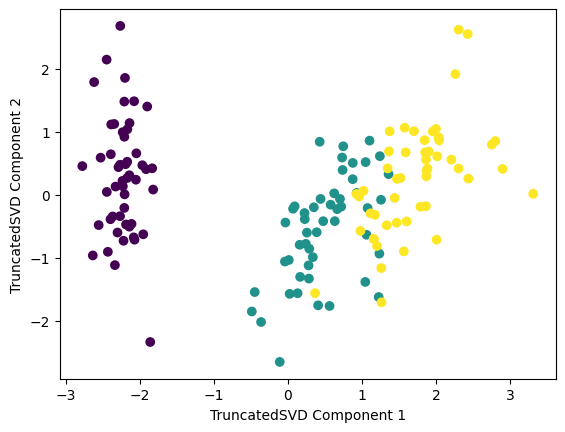

In [4]:
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
iris_ftrs = iris.data # X

# iris 데이터를 StandardScaler로 변환
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_ftrs) # X


# TruncatedSVD 수행
# 스케일링된 데이터를 기반으로 2개의 주요 component로 TruncatedSVD 변환 수행 
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_scaled) # Scaled X
iris_tsvd = tsvd.transform(iris_scaled) # Scaled X

# Scatter plot 2차원으로 TruncatedSVD 변환 된 데이터 표현. 품종은 색깔로 구분
plt.scatter(x=iris_tsvd[:,0], y= iris_tsvd[:,1], c= iris.target)
plt.xlabel('TruncatedSVD Component 1')
plt.ylabel('TruncatedSVD Component 2')

## NMF 
- Non-Negative Matrix Factorization
- Truncated SVD와 같이 낮은 랭크를 통한 행렬 근사 방식

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


Text(0, 0.5, 'NMF Component 2')

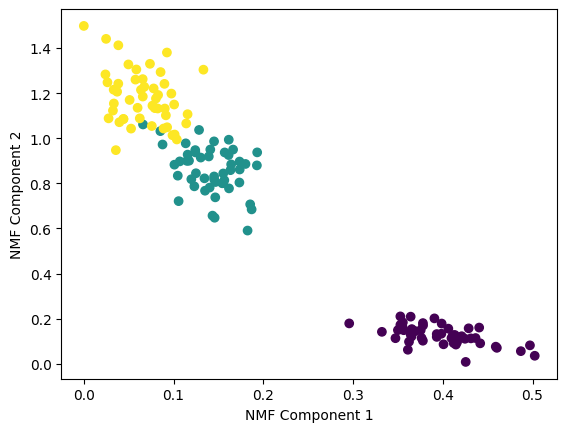

In [5]:
from sklearn.decomposition import NMF
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
iris_ftrs = iris.data # X
nmf = NMF(n_components=2) 
nmf.fit(iris_ftrs) # X
iris_nmf = nmf.transform(iris_ftrs) # X
plt.scatter(x=iris_nmf[:,0], y= iris_nmf[:,1], c= iris.target)
plt.xlabel('NMF Component 1')
plt.ylabel('NMF Component 2')